In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Linear Model

### Linear models for regression

w[0]: 0.393906  b: -0.031804


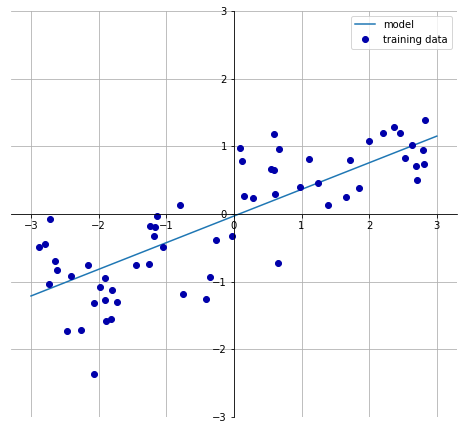

In [5]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

### Linear Regression aka Ordinary Least Squares

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# using make_wave dataset with one feature
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [17]:
print('slope or weights or lr.coef_: {}'.format(lr.coef_))
print('offset or intercept lr.intercept_: {}'.format(lr.intercept_))

slope or weights or lr.coef_: [0.39390555]
offset or intercept lr.intercept_: -0.031804343026759746


In [19]:
# to test the model:
print('training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

# with higher dimensional datasets (meaning a large number of features),
# linear models become more powerful, and there is a higher chance of overfitting.

training set score: 0.67
test set score: 0.66


In [24]:
# using more complex dataset, boston_extended, with more features

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [25]:
print('slope or weights or lr.coef_: {}'.format(lr.coef_))
print('offset or intercept lr.intercept_: {}'.format(lr.intercept_))

slope or weights or lr.coef_: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194

In [27]:
# to test/evaluate the model:
# clear sign of overfitting, 
# and thus should try to find a model to control complexity

print('training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lr.score(X_test, y_test)))

training set score: 0.95
test set score: 0.61


### Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is still Formula (1), as for ordinary least squares. 

In Ridge regression,the coefficients w are chosen not only so that they predict well on the training data, but
there is an additional constraint. We also want the magnitude of coefficients to be as
small as possible; in other words, all entries of w should be close to 0.

Intuitively, this means each feature should have as little effect on the outcome as possible
(which translates to having a small slope), while still predicting well.

This constraint is an example of what is called regularization. 

Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by Ridge
regression is known as l2 regularization.

In [28]:
from sklearn.linear_model import Ridge

# use boston_extended dataset
ridge = Ridge().fit(X_train, y_train) # alpha=1

In [33]:
# to test/evaluate the model:
print('training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

training set score: 0.89
test set score: 0.75


The training set score of Ridge is lower than for LinearRegression,
while the test set score is higher. 

This is consistent with our expectation. With linear regression, we were overfitting to our data. 
Ridge is a more restricted model, so we are less likely to overfit. 
A less complex model means worse performance on the training set, but better generalization.

As we are only interested in generalization performance, we should choose the Ridge
model over the LinearRegression model.

In [35]:
# Increasing alpha forces coefficients to move more towars zero
# which decreases training set performance, but will help generalization
# alpha=10

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

training set score: 0.79
test set score: 0.64


In [36]:
# alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

training set score: 0.928227
test set score: 0.772207


A higher alpha means a more restricted model, so we expect that the entries of coef_
have smaller magnitude for a high value of alpha than for a low value of alpha.

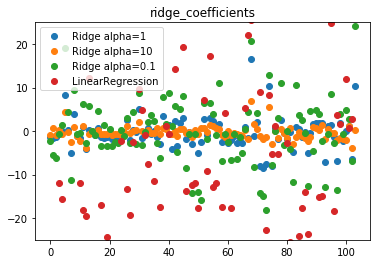

In [43]:
# x=features_entries; 0-104 in this case
# y=coef_values of each features
# example: (0,1) - x=0; features 1(0) y=1; coef_of features 1(0) = 1

plt.title('ridge_coefficients')
plt.plot(ridge.coef_, 'o', label='Ridge alpha=1')
plt.plot(ridge10.coef_, 'o', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.ylim(-25, 25)
plt.legend()

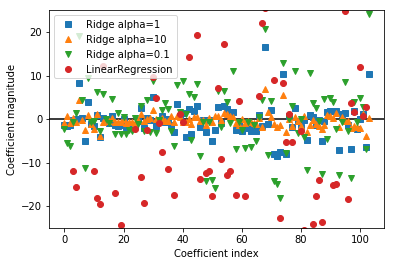

In [44]:
# x=features_entries; 0-104 in this case
# y=coef_values of each features
# example: (0,1) - x=0; features 1(0) y=1; coef_of features 1(0) = 1

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

### Lasso

An alternative to Ridge for regularizing linear regression is the Lasso. The lasso also
restricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly
different way, called “l1” regularization.

The consequence of l1 regularization is that when using the Lasso, some coefficients
are exactly zero. This means some features are entirely ignored by the model. This can
be seen as a form of automatic feature selection. Having some coefficients be exactly
zero often makes a model easier to interpret, and can reveal the most important features
of your model.

In [50]:
# use boston_extended dataset

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # alpha=1.0 - default
print('training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('number of features used: {}'.format(np.sum(lasso.coef_ !=0)))
print('number of features unused: {}'.format(np.sum(lasso.coef_ ==0)))

training set score: 0.29
test set score: 0.21
number of features used: 4
number of features unused: 100


Lasso does quite badly here on boston dataset, both on the training and test set.
This indicates underfitting. It used only 4 out of 104 features.

Similarly to Ridge, the
Lasso also has a regularization parameter alpha that controls how strongly coefficients
are pushed towards zero .

In [51]:
# to diminish underfitting let's try decreasing alpha
# alpha=0.01

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print('training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('number of features used: {}'.format(np.sum(lasso001.coef_ !=0)))
print('number of features unused: {}'.format(np.sum(lasso001.coef_ ==0)))

training set score: 0.90
test set score: 0.77
number of features used: 32
number of features unused: 72


c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [53]:
# alpha=0.0001

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print('training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('number of features used: {}'.format(np.sum(lasso00001.coef_ !=0)))
print('number of features unused: {}'.format(np.sum(lasso00001.coef_ ==0)))

training set score: 0.94
test set score: 0.70
number of features used: 100
number of features unused: 4


c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


If we set alpha too low, we again remove the effect of regularization and end up with a
result similar to LinearRegression.

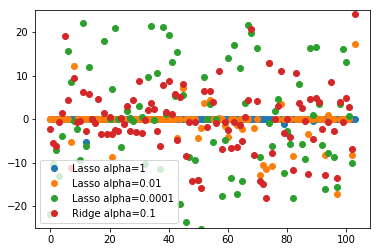

In [54]:
# Plot the coefficients of the different models
# x=features_entries; 0-104 in this case
# y=coef_values of each features
# example: (0,1) - x=0; features 1(0) y=1; coef_of features 1(0) = 1

plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()

In practice, Ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features.

## Linear Models for Classification

For linear models for regression, the output y was a linear function of the features: a
line, plane, or hyperplane (in higher dimensions).


For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that separates two classes using a line, a plane or a hyperplane.




The two most common linear classification algorithms are:

Logistic regression, implemented in linear_model.LogisticRegression
Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm, and should not be confused with LinearRegression

Linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for Support Vector Classifier).

c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


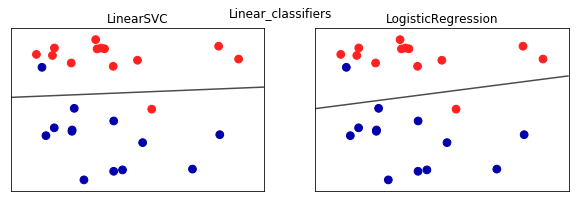

In [67]:
# use forge dataset

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


X, y = mglearn.datasets.make_forge()

fig, axes =  plt.subplots(1, 2, figsize=(10,3))
plt.suptitle('Linear_classifiers')

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:,0], X[:,1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title('%s' % clf.__class__.__name__)



For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called C, and higher values of C correspond to less
regularization. 

In other words, when using a high value of the parameter C, Logisti
cRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C, the model put more emphasis on finding a coefficient
vector w that is close to zero.

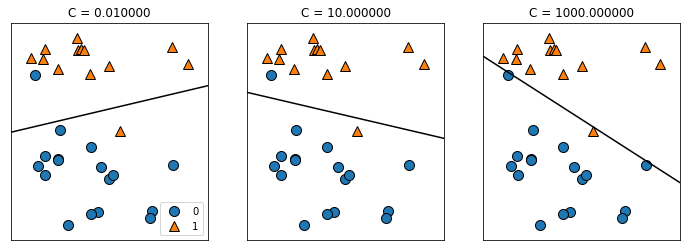

In [75]:
mglearn.plots.plot_linear_svc_regularization()

In [80]:
# analyze LinearLogistic
# use breast_cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

lg = LogisticRegression().fit(X_train, y_train) # default parameter value of C=1


# to evaluate the model:
print('training set score: {:.2f}'.format(lg.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lg.score(X_test, y_test)))


training set score: 0.95
test set score: 0.96


c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. As training and test set performance are very close,
it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model.

In [83]:
# using C=100
lg100 = LogisticRegression(C=100).fit(X_train, y_train)

# to evaluate the model:
print('training set score: {:.2f}'.format(lg100.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lg100.score(X_test, y_test)))

training set score: 0.97
test set score: 0.97


c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.

In [84]:
# investigate what happens if C=0.01 - more regularized

lg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

# to evaluate the model:
print('training set score: {:.2f}'.format(lg001.score(X_train, y_train)))
print('test set score: {:.2f}'.format(lg001.score(X_test, y_test)))

training set score: 0.93
test set score: 0.93


c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As expected, when moving more to the left in Figure model_complexity from an
already underfit model, both training and test set accuracy decrease relative to the
default parameters.

In [93]:
cancer.data.shape[1]

30

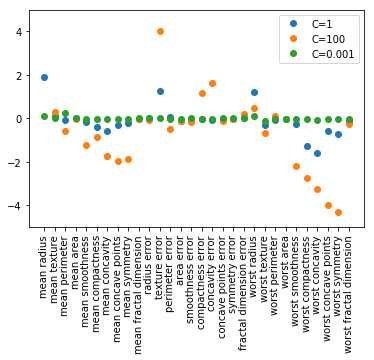

In [94]:
# x=features_entries; 0-104 in this case
# y=coef_values of each features
# example: (0,1) - x=0; features 1(0) y=1; coef_of features 1(0) = 1

plt.plot(lg.coef_.T, 'o', label="C=1")
plt.plot(lg100.coef_.T, 'o', label="C=100")
plt.plot(lg001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limits
the model to only using a few features. Here is the coefficient plot and classification
accuracies for L1 regularization:

c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


training accuracy of L1 logreg with C=0.001: 0.9131455399061033
test accuracy of L1 logreg with C=0.001: 0.9230769230769231
number of features used: 3

training accuracy of L1 logreg with C=1: 0.960093896713615
test accuracy of L1 logreg with C=1: 0.958041958041958
number of features used: 11

training accuracy of L1 logreg with C=100: 0.9859154929577465
test accuracy of L1 logreg with C=100: 0.9790209790209791
number of features used: 23



c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


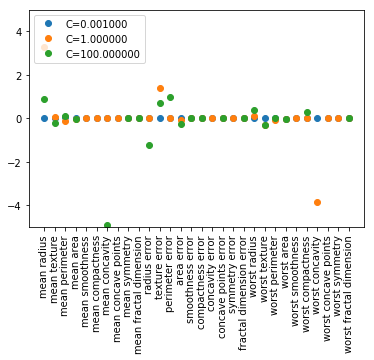

In [98]:
for C in [0.001, 1, 100]:
    lg_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('training accuracy of L1 logreg with C={0}: {1}'.format(C, lg_l1.score(X_train, y_train)))
    print('test accuracy of L1 logreg with C={0}: {1}'.format(C, lg_l1.score(X_test, y_test)))
    print('number of features used: {}\n'.format(np.sum(lg_l1.coef_ !=0)))
    plt.plot(lg_l1.coef_.T, 'o', label='C=%f' % C)

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(-5, 5)
plt.legend(loc=2)
    

### Linear Models for Multiclass Classification

#### one-vs-rest method

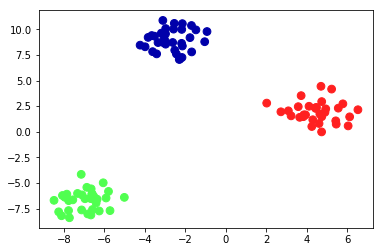

In [121]:
# apply one-vs-rest method to a three-class classification dataset

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap=mglearn.cm3)


In [122]:
# use LinearSVC classifier on the dataset

linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


(-10, 8)

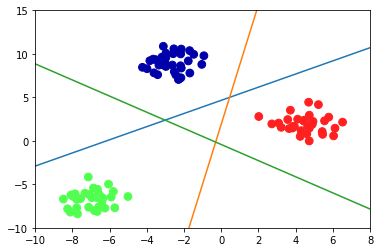

In [126]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

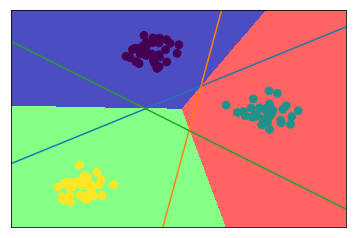

In [127]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

In [136]:
linear_svm.coef_[0] + linear_svm.intercept_[0]/linear_svm.coef_[1]

array([-2.43744644, 15.76267351])

In [131]:
linear_svm.intercept

array([-1.07745585,  0.13140751, -0.0860478 ])

In [132]:
linear_svm.coef_[0] + linear_svm.intercept_

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [138]:
linear_svm.predict(X)

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])